In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

mystyle = r'https://gist.githubusercontent.com/mbolt01/3087dffd11e70eccb08fdcf327374a5c/raw/std_fig'
plt.style.use(mystyle)

In [24]:
## this is not needed as data now saved as a .pkl and csv after merge.
needed = False
if needed == True:
    ## import dose data
    #df = pd.read_csv(r'results-20170626-1017.csv',index_col=0)
    df = pd.read_csv(r'results-20180204-2124.csv',index_col=0) ##  this was a recheck of the results. All matches.
    df.head(3)

    ## import treatment type info.
    df_info = pd.read_excel(r'Treatment_side.xlsx',parse_cols=3)
    df_info.head(3)

    ## merge them...
    df = df.merge(df_info,left_on='patient_id', right_on='id', how='outer')

    ## save merged data
    #df.to_pickle('parsport_dose_data.pkl')
    #df.to_csv('parsport_dose_data.csv')
else:
    print('using merged file')
    #df = pd.read_csv(r'parsport_dose_data.csv',index_col=0)
    #df = pd.read_pickle(r'parsport_dose_data.pkl')
    
    
print(len(df))
df.head(3)

using merged file
2495


,sub_dir,patient_id,plan_name,struct_label,structure,v107,v103,d5cc,v99,v105,...,d99_val,d99_unit,d0.1cc_val,d0.1cc_unit,d2cc_val,d2cc_unit,id,Type,Side,side_full
0,1001.0,1001.0,summed all phase,NaN,cl_deep_lparotid,"(0.0, 'cm3')","(0.0, 'cm3')","(0.0, 'Gy')","(0.0, 'cm3')","(0.0, 'cm3')",...,46.7,Gy,59.9,Gy,51.3,Gy,1001,Conformal,r,right
1,1001.0,1001.0,summed all phase,NaN,cl_lparotid,"(0.0, 'cm3')","(0.0, 'cm3')","(50.5, 'Gy')","(0.0, 'cm3')","(0.0, 'cm3')",...,15.9,Gy,58.9,Gy,52.4,Gy,1001,Conformal,r,right
2,1001.0,1001.0,summed all phase,NaN,cl_submandibular,"(0.0, 'cm3')","(4.375, 'cm3')","(66.400000000000006, 'Gy')","(5.40625, 'cm3')","(1.96875, 'cm3')",...,63.1,Gy,69.4,Gy,68.2,Gy,1001,Conformal,r,right


In [25]:
df.columns

Index(['sub_dir', 'patient_id', 'plan_name', 'struct_label', 'structure',
       'v107', 'v103', 'd5cc', 'v99', 'v105', 'min', 'd0.2cc', 'd0.5cc', 'v93',
       'v98', 'd90', 'max', 'd95', 'd100', 'v95', 'mean', 'd1cc', 'median',
       'v100', 'v90', 'd98', 'volume', 'd99', 'd0.1cc', 'd2cc', 'v107_val',
       'v107_unit', 'v103_val', 'v103_unit', 'd5cc_val', 'd5cc_unit',
       'v99_val', 'v99_unit', 'v105_val', 'v105_unit', 'min_val', 'min_unit',
       'd0.2cc_val', 'd0.2cc_unit', 'd0.5cc_val', 'd0.5cc_unit', 'v93_val',
       'v93_unit', 'v98_val', 'v98_unit', 'd90_val', 'd90_unit', 'max_val',
       'max_unit', 'd95_val', 'd95_unit', 'd100_val', 'd100_unit', 'v95_val',
       'v95_unit', 'mean_val', 'mean_unit', 'd1cc_val', 'd1cc_unit',
       'median_val', 'median_unit', 'v100_val', 'v100_unit', 'v90_val',
       'v90_unit', 'd98_val', 'd98_unit', 'volume_val', 'volume_unit',
       'd99_val', 'd99_unit', 'd0.1cc_val', 'd0.1cc_unit', 'd2cc_val',
       'd2cc_unit', 'id', 'Type',

In [26]:
## show structures:
for structure in df['struct_label'].unique():
    print(structure)

nan
cord
l_parotid
pharynx
ptv1
ptv2
ptv3
r_parotid


C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


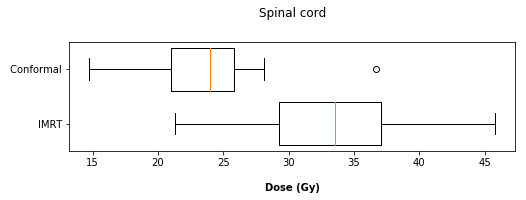

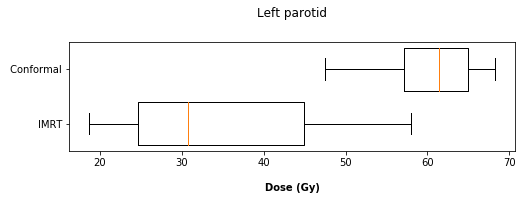

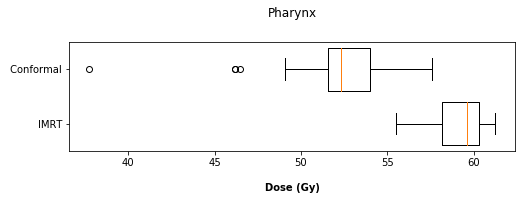

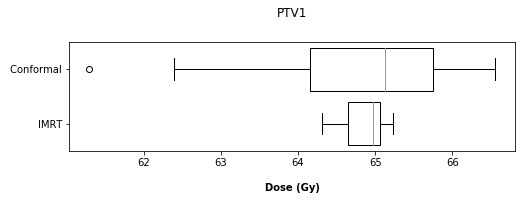

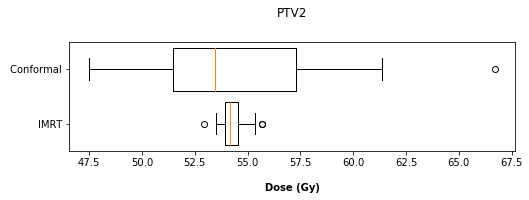

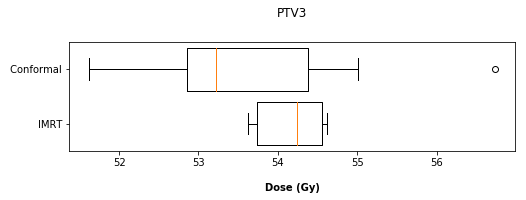

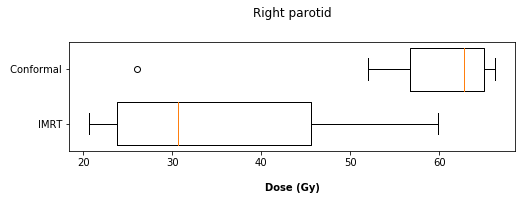

In [27]:
## plot of PTV1 mean SDs for imrt and conformal:

my_structs = ['ptv1','l_parotid']
my_structs = sorted(df['struct_label'].dropna().unique())
my_param = 'mean'

## auto create the correct lookup from the above specification
my_val = my_param + '_val'

## dict for formatted titles/structure names

struct_names = {'cord':'Spinal cord',
               'l_parotid':'Left parotid',
               'r_parotid':'Right parotid',
               'pharynx':'Pharynx',
               'ptv1':'PTV1',
               'ptv2':'PTV2',
               'ptv3':'PTV3'}

all_sds = {}

## box plots for each structure
for my_struct in my_structs:

    #data = df[df['struct_label']==my_struct] ## get the required rows

    imrt = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='IMRT')][my_val].dropna().tolist())[1:-1]
    conf = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='Conformal')][my_val].dropna().tolist())[1:-1]
    
    imrt_sd = np.std(imrt)
    conf_sd = np.std(conf)
    
    ## save each SD
    all_sds[my_struct] = {'imrt':imrt_sd,
                         'conf':conf_sd}

    plt.figure(figsize = (8,2))
    plt.boxplot([imrt,conf],labels=['IMRT', ' Conformal'],vert=False,widths=0.8)
    #plt.xlim(60,70)
    plt.legend()
    plt.title(struct_names[my_struct])
    plt.xlabel('Dose (Gy)')
    #plt.savefig('boxplot-' + my_struct + '-mean.png', dpi=300, bbox_inches='tight')
    plt.show()

Ttest_indResult(statistic=-8.007003822201705, pvalue=2.1280850252632345e-11)


C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


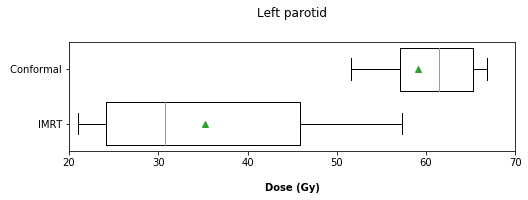

Ttest_indResult(statistic=-7.6840704693457536, pvalue=8.2100939660335555e-11)


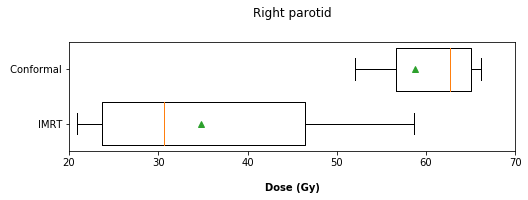

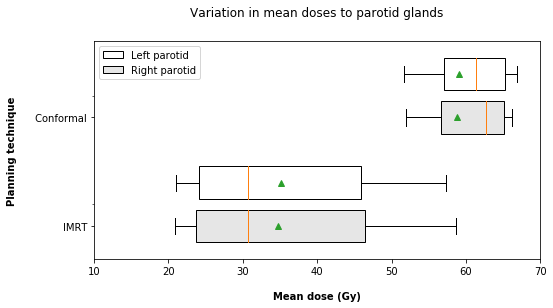

In [28]:
## produce a plto of l/r parotid on the same graph for thesis.
## ideally shade in the IMRT plot to differentiate it

both = []

for my_struct in ['l_parotid','r_parotid']:

    #data = df[df['struct_label']==my_struct] ## get the required rows

    imrt = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='IMRT')][my_val].dropna().tolist())#[1:-1]
    conf = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='Conformal')][my_val].dropna().tolist())#[1:-1]
    
    imrt_sd = np.std(imrt)
    conf_sd = np.std(conf)
    
    ## save each SD
    all_sds[my_struct] = {'imrt':imrt_sd,
                         'conf':conf_sd}
    
    print(stats.ttest_ind(imrt,conf))
    
    both.append([imrt,conf])

    plt.figure(figsize = (8,2))
    plt.boxplot([imrt,conf],labels=['IMRT', ' Conformal'],vert=False,widths=0.8,whis=[5,95],sym='',showmeans=True)
    plt.xlim(20,70)
    plt.legend()
    plt.title(struct_names[my_struct])
    plt.xlabel('Dose (Gy)')
    #plt.savefig('boxplot-' + my_struct + '-mean.png', dpi=300, bbox_inches='tight')
    plt.show()

    
## combined plot - uses ax. so can get auto legend from colour of boxplots
fig, ax = plt.subplots(figsize=(8, 4))

offset = 0.2
width = 0.3
## left
bp1 = ax.boxplot(both[0],labels=['IMRT', ' Conformal'],vert=False,widths=width,whis=[5,95],sym='',showmeans=True,
            positions=[1+offset,2+offset], patch_artist=True,boxprops={'facecolor':'white'})
## right
bp2 = ax.boxplot(both[1],labels=['IMRT', ' Conformal'],vert=False,widths=width,whis=[5,95],sym='',showmeans=True,
           positions=[1-offset,2-offset], patch_artist=True,boxprops={'facecolor':'#E6E6E6','alpha':1,'edgecolor':'black'})
ax.set_xlim(10,70)
ax.set_yticks([1,2],['IMRT', ' Conformal'])
ax.set_ylim(0.5,2.5)
ax.set_ylabel('Planning technique')
ax.set_xlabel('Mean dose (Gy)')
plt.title('Variation in mean doses to parotid glands')



## add legend key... need to add shaded box?
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Left parotid', 'Right parotid'])


plt.legend()

#plt.savefig('parotid_mean_doses.png',dpi=300,bbox_inches='tight')
plt.show()

## the left and right are remarkably similar!!

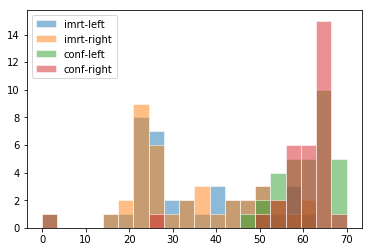

imrt-left NormaltestResult(statistic=7.7726855611014241, pvalue=0.020520256052801656)
imrt-right NormaltestResult(statistic=7.2651990269481255, pvalue=0.026447344743826127)
conf-left NormaltestResult(statistic=58.819738499017397, pvalue=1.6883250780473734e-13)
conf-right NormaltestResult(statistic=51.174928552904021, pvalue=7.7180121663646405e-12)


In [63]:
## check if parotid doses are 'normal'
## Probably skewed in some way...

plt.hist(both[0][0],alpha=0.5,label='imrt-left',range=(0,70),bins=20,edgecolor='white')
plt.hist(both[1][0],alpha=0.5,label='imrt-right',range=(0,70),bins=20,edgecolor='white')
plt.hist(both[0][1],alpha=0.5,label='conf-left',range=(0,70),bins=20,edgecolor='white')
plt.hist(both[1][1],alpha=0.5,label='conf-right',range=(0,70),bins=20,edgecolor='white')
plt.legend()
plt.show()

print('imrt-left',stats.normaltest(both[0][0]))
print('imrt-right',stats.normaltest(both[1][0]))
print('conf-left',stats.normaltest(both[0][1]))
print('conf-right',stats.normaltest(both[1][1]))

## all are seen to be normally distributed, and so the Bartlett test is ok to use when comparing SDs.

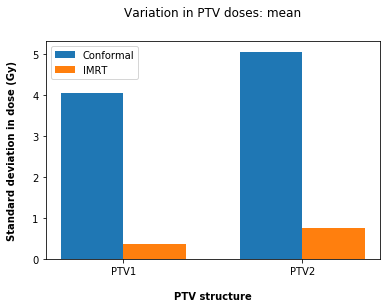

BartlettResult(statistic=94.609734973563562, pvalue=2.3187517928071163e-22)
LeveneResult(statistic=29.383027133159782, pvalue=6.7558695319224094e-07)


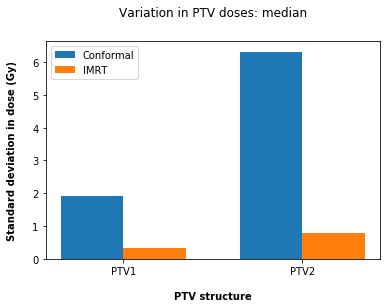

BartlettResult(statistic=107.32824809740841, pvalue=3.7721926478787313e-25)
LeveneResult(statistic=20.991858414298338, pvalue=1.7748114262001729e-05)


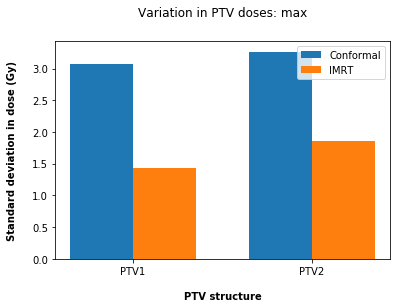

BartlettResult(statistic=11.324853810524406, pvalue=0.000764765476841425)
LeveneResult(statistic=2.637437758155591, pvalue=0.10851240475493297)


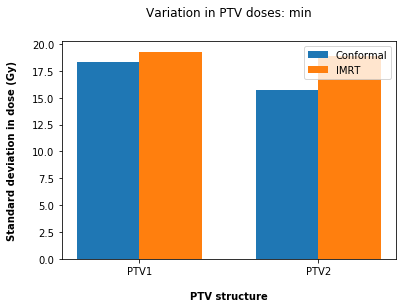

BartlettResult(statistic=1.2305545187727345, pvalue=0.26729922447928528)
LeveneResult(statistic=2.094151749188593, pvalue=0.15197603896185116)


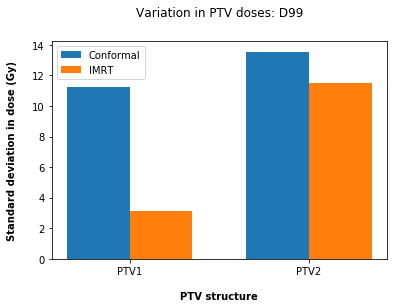

BartlettResult(statistic=1.0358042498309517, pvalue=0.30879930416205481)
LeveneResult(statistic=2.3746428841020264, pvalue=0.1274734273687885)


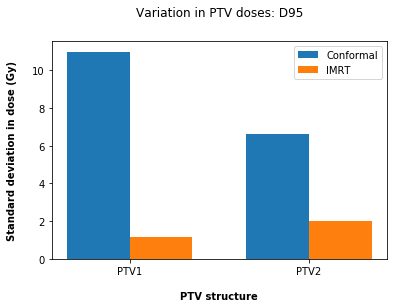

BartlettResult(statistic=44.255300838331848, pvalue=2.8822286465773062e-11)
LeveneResult(statistic=13.284624957793984, pvalue=0.00048718362149044166)


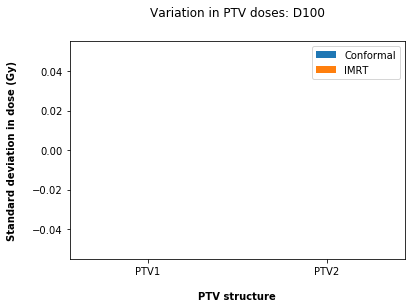

BartlettResult(statistic=nan, pvalue=nan)
LeveneResult(statistic=nan, pvalue=nan)


C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1864: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1864: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in

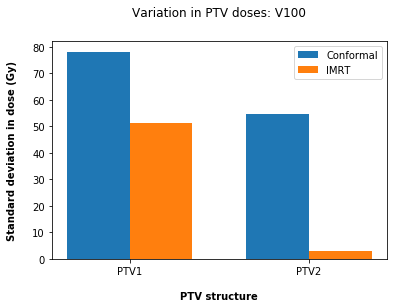

BartlettResult(statistic=167.83872331744311, pvalue=2.1939572946415301e-38)
LeveneResult(statistic=20.695763007281037, pvalue=2.0035140415358042e-05)


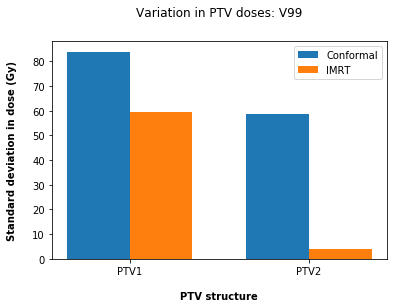

BartlettResult(statistic=151.90691349148315, pvalue=6.6400413672686287e-35)
LeveneResult(statistic=19.491431419765128, pvalue=3.2952427582872238e-05)


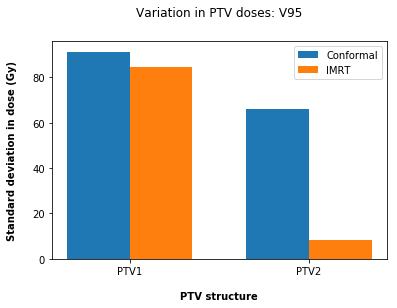

BartlettResult(statistic=107.72567544547472, pvalue=3.0867772980020531e-25)
LeveneResult(statistic=23.576950572832764, pvalue=6.271864321305992e-06)


In [106]:
## bar plot of SDs for each structure in list
bar_structs = ['ptv1','ptv2']#,'l_parotid','r_parotid','cord'] ## ordered as want in plot

bar_labels = [struct_names[i] for i in bar_structs] ## create list of labels in same order


my_param = 'mean'

for my_param in ['mean','median','max','min','D99','D95','D100','V100','V99','V95']:

    ## auto create the correct lookup from the above specification
    my_val = my_param.lower() + '_val'

    ## get all the mean values and calc SDS.
    all_sds = {}

    for my_struct in bar_structs:

        #data = df[df['struct_label']==my_struct] ## get the required rows

        imrt = df[(df['struct_label']==my_struct) & (df['Type']=='IMRT')][my_val].dropna().tolist()#[1:-1]
        conf = df[(df['struct_label']==my_struct) & (df['Type']=='Conformal')][my_val].dropna().tolist()#[1:-1]

        imrt_sd = np.std(imrt)
        conf_sd = np.std(conf)

        ## save each SD
        all_sds[my_struct] = {'imrt':imrt_sd,
                             'conf':conf_sd}

    ## get sds from above into 2 lists of values in desired order
    imrt_sds = []
    conf_sds = []

    for struct in bar_structs:
        imrt_sd = all_sds[struct]['imrt']
        conf_sd = all_sds[struct]['conf']

        imrt_sds.append(imrt_sd)
        conf_sds.append(conf_sd)

    imrt_sds_perc = imrt_sds#[100*i/65 for i in imrt_sds]
    conf_sds_perc = conf_sds#[100*i/65 for i in conf_sds]

    w = 0.35
    offset = w
    the_left = [i for i in range(len(bar_structs))]
    the_left1 = [i-offset/2 for i in the_left]
    the_left2 = [i+offset/2 for i in the_left]

    plt.bar(left=the_left1,height=conf_sds_perc,alpha=1,width=w,label='Conformal')
    plt.bar(left=the_left2,height=imrt_sds_perc,alpha=1,width=w,label='IMRT')

    plt.xticks(the_left,bar_labels)
    plt.title('Variation in PTV doses: ' + my_param)
    plt.legend()
    plt.xlabel('PTV structure')
    plt.ylabel('Standard deviation in dose (Gy)')
    #plt.yticks([0,1,2,3,4,5])
    #plt.ylim(0,10)

    #plt.savefig('PTV-SD-var-abs-ptv1+2only-'+my_param+'.png',dpi=300, bbox_inches='tight')

    plt.show()

## statistical comparison
## need to use the raw values

## used bartlett test . could have used Levene which is more robust if non-normal
    print(stats.bartlett(imrt,conf))
    print(stats.levene(imrt,conf))

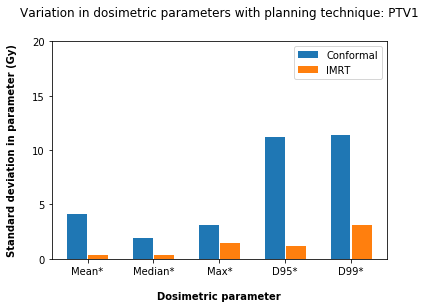

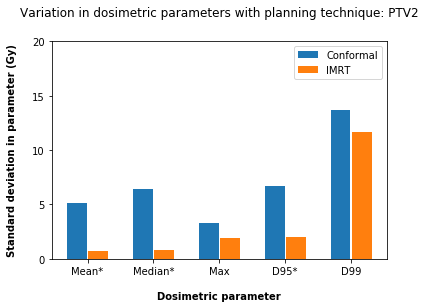

In [146]:
## Include multiple plots from above into a single figure.

## can just loop through and set the positions of each set of data based on number in loop?
## get the individual data points into dict, then plot using these

## just do for PTV1 as is the primary target and highest dose. Most time will be spent conforming this
## and can then fit more on plot

## do for these params (4 is max can reasonably fit into single plot without looking messy)
my_params = ['Mean','Median','Max','D95', 'D99']
my_structs = ['PTV1','PTV2']
my_labels = my_params

for my_struct in my_structs:

    plot_data = {}
    ## get the data
    for my_param in my_params:

        my_val = my_param.lower() + '_val' ## lookup column


        ## get the data
        data = df[df['struct_label']==my_struct.lower()]

        imrt = data[data['Type']=='IMRT'][my_val].dropna()
        conf = data[data['Type']=='Conformal'][my_val].dropna()



        ## get comparison results t-test for use
        #signif = stats.bartlett(imrt.tolist(),conf.tolist())
        signif = stats.levene(imrt.tolist(),conf.tolist())

        ## store the SDs
        plot_data[my_param] = {'imrt':imrt.std(),
                               'conf':conf.std(),
                               'sig':signif}

    my_width = 0.3
    my_offset = 0.16

    pval_test = 0.05

    include_signif = True

    params = []
    imrts = []
    confs = []
    signif = []
    posns = [i for i in range(len(plot_data))]
    for param in my_params:
        params.append(param)
        imrts.append(plot_data[param]['imrt'])
        confs.append(plot_data[param]['conf'])
        if plot_data[param]['sig'].pvalue <=pval_test:
            if include_signif == True:
                signif.append('*')
            else:
                signif.append('')
        else:
            signif.append('')

    plot_labels = [my_params[i]+signif[i] for i in range(len(my_params))]

    plt.bar(left=[i-my_offset for i in posns],height=confs,alpha=1,width=my_width,label='Conformal')
    plt.bar(left=[i+my_offset for i in posns],height=imrts,alpha=1,width=my_width,label='IMRT')
    plt.legend()
    plt.xticks(posns,plot_labels)
    plt.yticks([0,5,10,15,20])

    plt.xlabel('Dosimetric parameter')
    plt.ylabel('Standard deviation in parameter (Gy)')
    plt.title('Variation in dosimetric parameters with planning technique: ' + my_struct)

    #plt.savefig('multi_stats-imrtVconf-' + my_struct + '.png',dpi=300,bbox_inches='tight')

    plt.show()

    plot_data

In [102]:
df.columns

Index(['sub_dir', 'patient_id', 'plan_name', 'struct_label', 'structure',
       'v107', 'v103', 'd5cc', 'v99', 'v105', 'min', 'd0.2cc', 'd0.5cc', 'v93',
       'v98', 'd90', 'max', 'd95', 'd100', 'v95', 'mean', 'd1cc', 'median',
       'v100', 'v90', 'd98', 'volume', 'd99', 'd0.1cc', 'd2cc', 'v107_val',
       'v107_unit', 'v103_val', 'v103_unit', 'd5cc_val', 'd5cc_unit',
       'v99_val', 'v99_unit', 'v105_val', 'v105_unit', 'min_val', 'min_unit',
       'd0.2cc_val', 'd0.2cc_unit', 'd0.5cc_val', 'd0.5cc_unit', 'v93_val',
       'v93_unit', 'v98_val', 'v98_unit', 'd90_val', 'd90_unit', 'max_val',
       'max_unit', 'd95_val', 'd95_unit', 'd100_val', 'd100_unit', 'v95_val',
       'v95_unit', 'mean_val', 'mean_unit', 'd1cc_val', 'd1cc_unit',
       'median_val', 'median_unit', 'v100_val', 'v100_unit', 'v90_val',
       'v90_unit', 'd98_val', 'd98_unit', 'volume_val', 'volume_unit',
       'd99_val', 'd99_unit', 'd0.1cc_val', 'd0.1cc_unit', 'd2cc_val',
       'd2cc_unit', 'id', 'Type',

ptv1 Ttest_indResult(statistic=0.95414674009638734, pvalue=0.34343924510754475)
ptv1 imrt NormaltestResult(statistic=13.026174774888368, pvalue=0.0014838912962219604)
ptv1 conf NormaltestResult(statistic=13.026174774888368, pvalue=0.0014838912962219604)
ptv2 Ttest_indResult(statistic=-0.31381861307657744, pvalue=0.75451855338217722)
ptv2 imrt NormaltestResult(statistic=13.546486333098102, pvalue=0.0011439785152816964)
ptv2 conf NormaltestResult(statistic=13.546486333098102, pvalue=0.0011439785152816964)


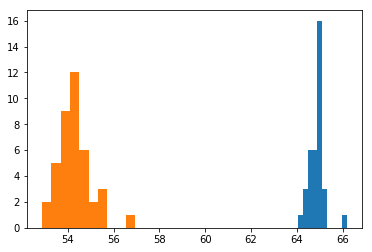

In [89]:
## get the PTV doses and test for normality...

my_param = 'mean'

## auto create the correct lookup from the above specification
my_val = my_param + '_val'

all_ptv_data = {}
for my_struct in ['ptv1','ptv2']:

    #data = df[df['struct_label']==my_struct] ## get the required rows

    imrt = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='IMRT')][my_val].dropna().tolist())#[1:-1]
    conf = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='Conformal')][my_val].dropna().tolist())#[1:-1]
    
    ## save the data for each structure
    all_ptv_data[my_struct] = {'imrt':imrt,
                               'conf':conf}
    
    print(my_struct,stats.ttest_ind(imrt,conf)) ##  this indicates the mean of the data does not differ significantly
    
    print(my_struct,'imrt',stats.normaltest(imrt))
    print(my_struct,'conf',stats.normaltest(imrt)) ##  all but ptv3 are non-normally distributed...
    ## so lets look at the SDs
    
plt.hist(all_ptv_data['ptv1']['imrt'])
plt.hist(all_ptv_data['ptv2']['imrt'])
#plt.hist(all_ptv_data['ptv3']['imrt'])
plt.show()

In [31]:
all_sds

{'ptv1': {'conf': 4.0511506616640416, 'imrt': 0.35233457683469099},
 'ptv2': {'conf': 5.0562885437398037, 'imrt': 0.75080088950417545},
 'ptv3': {'conf': 2.9541836398630115, 'imrt': 0.66804058262857224}}

ptv1
ptv2
ptv3
pharynx
l_parotid
r_parotid
cord


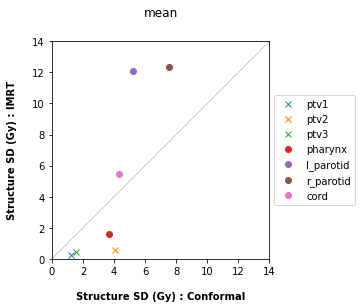

In [34]:
struct_info = {'cord':{'type':'OAR'},
               'l_parotid':{'type':'OAR'},
                'pharynx':{'type':'OAR'},
                'ptv1':{'type':'PTV'},
                'ptv2':{'type':'PTV'},
                'ptv3':{'type':'PTV'},
                'r_parotid':{'type':'OAR'}
               }

## get all the mean values and calc SDS.
my_structs = ['ptv1','l_parotid']
my_structs = sorted(df['struct_label'].dropna().unique())
my_param = 'mean'

## auto create the correct lookup from the above specification
my_val = my_param + '_val'

## dict for formatted titles/structure names

struct_names = {'cord':'Spinal cord',
               'l_parotid':'Left parotid',
               'r_parotid':'Right parotid',
               'pharynx':'Pharynx',
               'ptv1':'PTV1',
               'ptv2':'PTV2',
               'ptv3':'PTV3'}

all_sds = {}

## box plots for each structure
for my_struct in my_structs:

    #data = df[df['struct_label']==my_struct] ## get the required rows

    imrt = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='IMRT')][my_val].dropna().tolist())[1:-1]
    conf = sorted(df[(df['struct_label']==my_struct) & (df['Type']=='Conformal')][my_val].dropna().tolist())[1:-1]
    
    imrt_sd = np.std(imrt)
    conf_sd = np.std(conf)
    
    ## save each SD
    all_sds[my_struct] = {'imrt':imrt_sd,
                         'conf':conf_sd}


for struct in ['ptv1','ptv2','ptv3','pharynx','l_parotid','r_parotid','cord']: ## specify explicitely to order legend
    print(struct)
    if struct_info[struct]['type']=='PTV':
        marker = 'x'
    else:
        marker = 'o'
    plt.plot(all_sds[struct]['conf'],all_sds[struct]['imrt'],ls='',marker=marker,label=struct)
plt.xlabel('Structure SD (Gy) : Conformal')
plt.ylabel('Structure SD (Gy) : IMRT')
plt.axes().set_aspect('equal')
my_lim = 14
plt.xlim(0,my_lim)
plt.ylim(0,my_lim)
plt.plot([0,my_lim],[0,my_lim],ls=':',zorder=0,lw=0.5,c='black')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(my_param)
plt.show()

## basically for PTVs the mean dose is much more consistent and so will directly relate to beam output/TCP etc.

## Get some simple info on number of patients included in analysis etc.

In [35]:
df.describe()

,sub_dir,patient_id,v107_val,v103_val,d5cc_val,v99_val,v105_val,min_val,d0.2cc_val,d0.5cc_val,...,d1cc_val,median_val,v100_val,v90_val,d98_val,volume_val,d99_val,d0.1cc_val,d2cc_val,id
count,2471.000000,2471.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,...,2267.000000,2267.000000,2267.000000,2267.000000,2267.000000,2464.000000,2267.000000,2267.000000,2267.000000,2495.000000
mean,1593.342776,1593.342776,1.089672,8.750920,45.844658,27.287687,3.375134,20.210591,54.003463,52.522691,...,51.280066,42.294993,22.894272,42.091749,26.753476,116.507321,25.126581,54.900710,49.595249,1590.880561
std,1239.144041,1239.144041,6.472960,27.148537,25.612919,67.639014,13.345229,20.976014,22.349969,23.263196,...,23.813058,23.525790,57.565243,103.359769,22.768113,448.649894,22.447874,21.850644,24.480010,1235.057215
min,1001.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.000000
25%,1023.000000,1023.000000,0.000000,0.000000,30.625000,0.000000,0.000000,1.965000,47.055000,44.345000,...,42.690000,21.250000,0.000000,0.000000,4.695000,7.480469,4.150000,48.995000,40.665000,1023.000000
50%,1045.000000,1045.000000,0.000000,0.000000,59.090000,0.703125,0.000000,10.580000,65.400000,64.720000,...,63.960000,51.580000,0.343750,5.453125,20.060000,22.503125,17.040000,65.770000,62.830000,1045.000000
75%,1066.000000,1066.000000,0.000000,4.514687,66.800000,14.710938,0.590875,40.430000,68.745000,68.300000,...,67.945000,64.320000,12.304688,26.808427,49.355000,126.260937,47.700000,69.010000,67.555000,1066.000000
max,6006.000000,6006.000000,178.064958,489.681215,82.460000,879.488068,289.000981,69.530000,83.030000,82.930000,...,82.830000,77.200000,783.484195,1700.042441,69.680000,11128.437000,69.530000,83.090000,82.690000,6006.000000


In [36]:
df.columns

Index(['sub_dir', 'patient_id', 'plan_name', 'struct_label', 'structure',
       'v107', 'v103', 'd5cc', 'v99', 'v105', 'min', 'd0.2cc', 'd0.5cc', 'v93',
       'v98', 'd90', 'max', 'd95', 'd100', 'v95', 'mean', 'd1cc', 'median',
       'v100', 'v90', 'd98', 'volume', 'd99', 'd0.1cc', 'd2cc', 'v107_val',
       'v107_unit', 'v103_val', 'v103_unit', 'd5cc_val', 'd5cc_unit',
       'v99_val', 'v99_unit', 'v105_val', 'v105_unit', 'min_val', 'min_unit',
       'd0.2cc_val', 'd0.2cc_unit', 'd0.5cc_val', 'd0.5cc_unit', 'v93_val',
       'v93_unit', 'v98_val', 'v98_unit', 'd90_val', 'd90_unit', 'max_val',
       'max_unit', 'd95_val', 'd95_unit', 'd100_val', 'd100_unit', 'v95_val',
       'v95_unit', 'mean_val', 'mean_unit', 'd1cc_val', 'd1cc_unit',
       'median_val', 'median_unit', 'v100_val', 'v100_unit', 'v90_val',
       'v90_unit', 'd98_val', 'd98_unit', 'volume_val', 'volume_unit',
       'd99_val', 'd99_unit', 'd0.1cc_val', 'd0.1cc_unit', 'd2cc_val',
       'd2cc_unit', 'id', 'Type',

In [37]:
len(df[df['Type']=='Conformal']['patient_id'].unique())

34

In [38]:
len(df[df['Type']=='IMRT']['patient_id'].unique())

38

In [39]:
len(df['patient_id'].unique())

71

In [40]:
i_count = 0
c_count = 0

for patient in df['patient_id'].unique():
    the_t = df[df['patient_id']==patient]['Type'].unique()
    print(patient,df[df['patient_id']==patient]['Type'].unique())
    if the_t == ['IMRT']:
        i_count = i_count+1
    if the_t == ['Conformal']:
        c_count = c_count + 1
print('i',i_count)
print('c',c_count)

1001.0 ['Conformal']
1002.0 ['IMRT']
1003.0 ['Conformal']
1004.0 ['IMRT']
1005.0 ['Conformal']
1007.0 ['Conformal']
1008.0 ['IMRT']
1010.0 ['Conformal']
1011.0 ['Conformal']
1012.0 ['IMRT']
1013.0 ['Conformal']
1015.0 ['Conformal']
1017.0 ['IMRT']
1019.0 ['IMRT']
1022.0 ['IMRT']
1023.0 ['Conformal']
1024.0 ['IMRT']
1025.0 ['IMRT']
1027.0 ['IMRT']
1028.0 ['Conformal']
1029.0 ['IMRT']
1030.0 ['Conformal']
1031.0 ['IMRT']
1032.0 ['Conformal']
1033.0 ['Conformal']
1034.0 ['IMRT']
1035.0 ['IMRT']
1037.0 ['Conformal']
1038.0 ['Conformal']
1039.0 ['IMRT']
1041.0 ['IMRT']
1043.0 ['IMRT']
1045.0 ['Conformal']
1046.0 ['IMRT']
1048.0 ['IMRT']
1049.0 ['IMRT']
1050.0 ['Conformal']
1051.0 ['IMRT']
1053.0 ['Conformal']
1054.0 ['IMRT']
1055.0 ['IMRT']
1056.0 ['Conformal']
1057.0 ['Conformal']
1059.0 ['Conformal']
1060.0 ['IMRT']
1061.0 ['Conformal']
1062.0 ['IMRT']
1065.0 ['IMRT']
1066.0 ['IMRT']
1502.0 ['Conformal']
1503.0 ['IMRT']
1504.0 ['Conformal']
1505.0 ['IMRT']
1508.0 ['IMRT']
2501.0 ['Conform

In [41]:
imrt = df[df['Type']=='IMRT'].dropna()
cfrt = df[df['Type']=='Conformal'].dropna()

In [42]:
len(cfrt['patient_id'].unique())

33

In [43]:
for i in df['patient_id'].unique():
    print(i, df[df['patient_id']==i]['struct_label'].dropna().unique())

1001.0 ['cord' 'l_parotid' 'pharynx' 'ptv1' 'ptv2' 'ptv3' 'r_parotid']
1002.0 ['l_parotid' 'pharynx' 'ptv1' 'ptv2' 'ptv3' 'r_parotid']
1003.0 ['l_parotid' 'ptv1' 'ptv2' 'ptv3' 'r_parotid' 'cord' 'pharynx']
1004.0 ['l_parotid' 'pharynx' 'ptv1' 'ptv2' 'ptv3' 'r_parotid' 'cord']
1005.0 ['cord' 'l_parotid' 'pharynx' 'ptv1' 'ptv2' 'ptv3' 'r_parotid']
1007.0 ['l_parotid' 'pharynx' 'ptv1' 'ptv2' 'ptv3' 'r_parotid' 'cord']
1008.0 ['l_parotid' 'pharynx' 'ptv1' 'ptv2' 'ptv3' 'r_parotid' 'cord']
1010.0 ['l_parotid' 'pharynx' 'ptv1' 'ptv2' 'ptv3' 'r_parotid' 'cord']
1011.0 ['l_parotid' 'pharynx' 'ptv1' 'ptv2' 'r_parotid' 'cord']
1012.0 ['l_parotid' 'r_parotid' 'pharynx' 'ptv1' 'ptv2' 'ptv3' 'cord']
1013.0 ['l_parotid' 'pharynx' 'ptv1' 'ptv2' 'ptv3' 'r_parotid' 'cord']
1015.0 ['l_parotid' 'pharynx' 'ptv1' 'ptv2' 'r_parotid' 'cord']
1017.0 ['l_parotid' 'pharynx' 'ptv1' 'ptv2' 'r_parotid' 'cord']
1019.0 ['l_parotid' 'pharynx' 'ptv1' 'ptv2' 'ptv3' 'r_parotid' 'cord']
1022.0 ['l_parotid' 'pharynx' 'ptv